In [ ]:
# Reading the data
# https://archive.ics.uci.edu/dataset/186/wine+quality
# Regression is an amazing topic and segues well into the next topic.
# With regression, you are able to predict the value of a continuous variable based on the values of other variables.
# Some regressions model linear or nonlinear dependency.
# There is a broad range of applications, such as predicting product demand based on expenditure.
# Time series prediction of the stock market with autoregressive models.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
redwinedf = pd.read_csv('/content/winequality-red.csv', sep=';')
redwinedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# Modeling wine preferences by data mining from physicochemical properties
# function means 25%% median 75%% mean std min max values
redwinedf.describe().T[['min','max','mean']]

,min,max,mean
fixed acidity,4.600,15.900,8.320
volatile acidity,0.120,1.580,0.528
citric acid,0.000,1.000,0.271
residual sugar,0.900,15.500,2.539
chlorides,0.012,0.611,0.087
free sulfur dioxide,1.000,72.000,15.875
total sulfur dioxide,6.000,289.000,46.468
density,0.990,1.004,0.997
pH,2.740,4.010,3.311
sulphates,0.330,2.000,0.658


12X12 matrix

In [ ]:
#create coraltion matrix

ax= redwinedf[list(redwinedf.columns)].corr().sort_values(by=['quality'])
ax
#redwinedf[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
 #      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
   #    'pH', 'sulphates', 'alcohol', 'quality']].corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,-0.256,1.000,-0.552,0.002,0.061,-0.011,0.076,0.022,0.235,-0.261,-0.202,-0.391
total sulfur dioxide,-0.113,0.076,0.036,0.203,0.047,0.668,1.000,0.071,-0.066,0.043,-0.206,-0.185
density,0.668,0.022,0.365,0.355,0.201,-0.022,0.071,1.000,-0.342,0.149,-0.496,-0.175
chlorides,0.094,0.061,0.204,0.056,1.000,0.006,0.047,0.201,-0.265,0.371,-0.221,-0.129
pH,-0.683,0.235,-0.542,-0.086,-0.265,0.070,-0.066,-0.342,1.000,-0.197,0.206,-0.058
free sulfur dioxide,-0.154,-0.011,-0.061,0.187,0.006,1.000,0.668,-0.022,0.070,0.052,-0.069,-0.051
residual sugar,0.115,0.002,0.144,1.000,0.056,0.187,0.203,0.355,-0.086,0.006,0.042,0.014
fixed acidity,1.000,-0.256,0.672,0.115,0.094,-0.154,-0.113,0.668,-0.683,0.183,-0.062,0.124
citric acid,0.672,-0.552,1.000,0.144,0.204,-0.061,0.036,0.365,-0.542,0.313,0.110,0.226
sulphates,0.183,-0.261,0.313,0.006,0.371,0.052,0.043,0.149,-0.197,1.000,0.094,0.251


from matplotlib import pyplot as plt
ax['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ax['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ax['citric acid'].plot(kind='hist', bins=20, title='citric acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ax['residual sugar'].plot(kind='hist', bins=20, title='residual sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ax.plot(kind='scatter', x='fixed acidity', y='volatile acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ax.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ax.plot(kind='scatter', x='citric acid', y='residual sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ax.plot(kind='scatter', x='residual sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['quality']
  ys = series['fixed acidity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ax.sort_values('quality', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('quality')
_ = plt.ylabel('fixed acidity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['quality']
  ys = series['volatile acidity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ax.sort_values('quality', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('quality')
_ = plt.ylabel('volatile acidity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['quality']
  ys = series['citric acid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ax.sort_values('quality', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('quality')
_ = plt.ylabel('citric acid')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['quality']
  ys = series['residual sugar']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ax.sort_values('quality', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('quality')
_ = plt.ylabel('residual sugar')

from matplotlib import pyplot as plt
ax['fixed acidity'].plot(kind='line', figsize=(8, 4), title='fixed acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ax['volatile acidity'].plot(kind='line', figsize=(8, 4), title='volatile acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ax['citric acid'].plot(kind='line', figsize=(8, 4), title='citric acid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ax['residual sugar'].plot(kind='line', figsize=(8, 4), title='residual sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-15-8d7d699744cf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(y= 'cols', x= 'quality', data= ax,  palette='viridis'). set (title= 'Atributes va quality correlation', ylabel = "attributes",


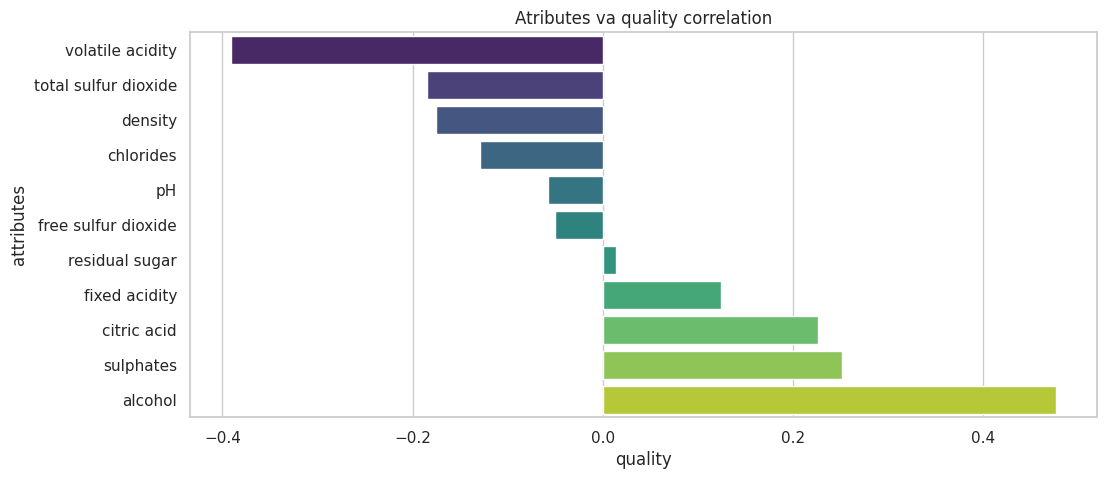

In [ ]:
import seaborn  as sns
ax= redwinedf[list(redwinedf.columns)].corr()
sns.set (style = "whitegrid", rc= {'figure.figsize': (11.7,5)})
ax['cols']= list(ax.columns)
ax.drop( ax[ ax['cols']== 'quality'].index, inplace=True)
ax= ax.sort_values(by=['quality'])
ax= sns.barplot(y= 'cols', x= 'quality', data= ax,  palette='viridis'). set (title= 'Atributes va quality correlation', ylabel = "attributes",
                                                         xlabel= 'quality');


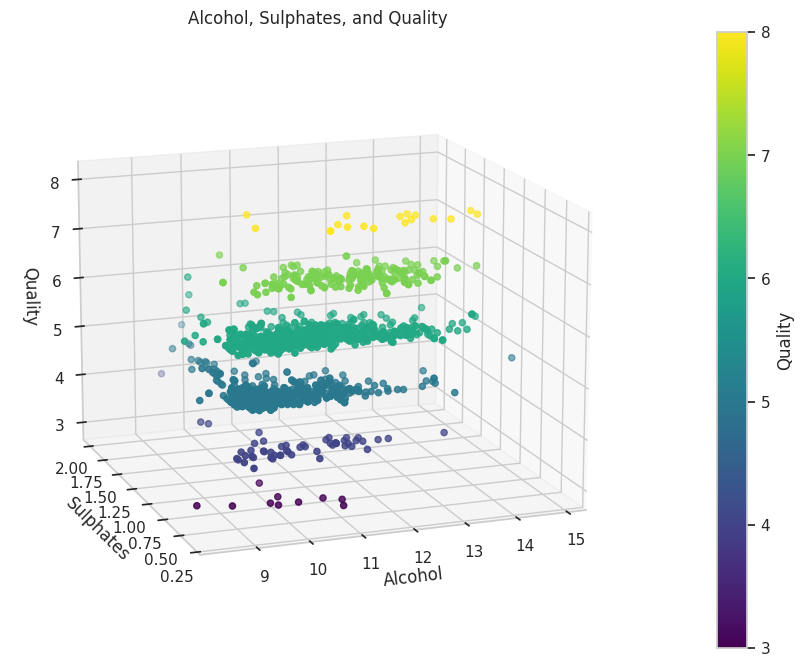

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming redwinedf is already defined
sns.set(style="whitegrid", rc={'figure.figsize': (11.7, 8)})

# Filter the DataFrame to include only the relevant columns
filtered_df = redwinedf[['alcohol', 'sulphates', 'quality']]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(filtered_df['alcohol'], filtered_df['sulphates'], filtered_df['quality'],
                     c=filtered_df['quality'], cmap='viridis')

# Set labels
ax.view_init(elev=15, azim=250)
ax.set_title('Alcohol, Sulphates, and Quality')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Sulphates')
ax.set_zlabel('Quality')

# Add color bar
color_bar = fig.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('Quality')

plt.show()


Resiudual standard error and coeficient of multiple determination y quality  x 1 alcohol , x2 suplhates


In [ ]:
!pip install statsmodels


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df is already defined
scores = redwinedf

# Fit the OLS model
model = ols('quality ~ alcohol + sulphates', data=scores).fit()
# Quality as a response, alcohol and sulphates as predictor variables
# Display the summary

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     295.0
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          9.62e-110
Time:                        23:31:42   Log-Likelihood:                -1675.1
No. Observations:                1599   AIC:                             3356.
Df Residuals:                    1596   BIC:                             3372.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3750      0.177      7.748      0.0

In [ ]:
import statsmodels.api as sm
print(sm.stats.anova_lm(model, typ=2))

           sum_sq       df       F  PR(>F)
alcohol   215.406    1.000 451.821   0.000
sulphates  44.977    1.000  94.340   0.000
Residual  760.894 1596.000     NaN     NaN


In [ ]:
#now all the information is there to determin SSR which is sum of squers
#MSR regrasion mean,f- stats,  p value and residuals standard error
#sample multiple linil regresion funciton
model.params


Intercept   1.375
alcohol     0.346
sulphates   0.994
dtype: float64

In [ ]:
#y=0.346x1+0.994x2+ 0.1375

In [ ]:
#coeficient of multiple determination R2
#R2 measures the proportion of total variationin y that is accountet by linearregresion model
print('R Squared:', f'({model.rsquared* 100:.2f})%')

R Squared: (26.99)%


In [ ]:
#overal regresion mean square

model.mse_model

140.63561608226524

In [ ]:
#residual mean square is important to determin residual standard error
model.mse_resid

0.4767505457549894

In [ ]:
#residuals tandard error
np.sqrt(model.mse_resid)
# Residual standard error is 0.69. This is the square root of the residual mean square.
# The smaller that value, the better the performance of the model.
# The actual future value of y is relatively close to the predicted value.



0.690471249042992

conficdence interval is the space that is between the two curves

In [ ]:
#SSE residual sum of squares needs to be calculated
#Dataset https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-datasetS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
health2 = pd.read_csv('/content/heart.csv', sep=',')
health2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#corelation between age and thalacht
health2[['thalachh', 'age']].corr()

,thalachh,age
thalachh,1.000000,-0.398522
age,-0.398522,1.000000


In [ ]:
#create the model for least square regression
model= ols('thalachh ~ age', data= health2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               thalachh   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     56.83
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           5.63e-13
Time:                        19:03:02   Log-Likelihood:                -1352.0
No. Observations:                 303   AIC:                             2708.
Df Residuals:                     301   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    204.2892      7.348     27.800      0.000     189.828     218.750
age           -1.0051      0.133     -7.539      0.000      -1.267      -0.743
==============================================================================
Omnibus:                       19.088   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.556
Skew:                          -0.652   Prob(JB):                     2.09e-05
Kurtosis:                       2.927   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
import pandas as pd
x0= pd.DataFrame(np.array([[40]]), columns= ['age'])
model.predict(x0)

#model predicst the max hear rate is 164 to find hteh confidence and interval we use get predict

0    164.086137
dtype: float64

In [ ]:
intervals = model.get_prediction(x0)
intervals.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,164.086137,2.264954,159.628986,168.543287,122.437834,205.734439


In [ ]:
#simple linear reg for the mean for the response max hear rate for the x value which is age
#creating data frame for x from 29 to 82 , this contains summary frame for these values

x0= pd.DataFrame(data= np.arange(29,82), columns= ['age'])
intervals= model.get_prediction(x0)
dfconf= intervals.summary_frame()
dfconf['age']= x0
dfconf.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,age
0,175.141982,3.591500,168.074352,182.209611,133.134051,217.149913,29
1,174.136905,3.466246,167.315760,180.958049,132.169740,216.104069,30
2,173.131828,3.341616,166.555940,179.707717,131.203828,215.059828,31
3,172.126751,3.217684,165.794747,178.458756,130.236309,214.017194,32
4,171.121674,3.094532,165.032018,177.211331,129.267179,212.976170,33


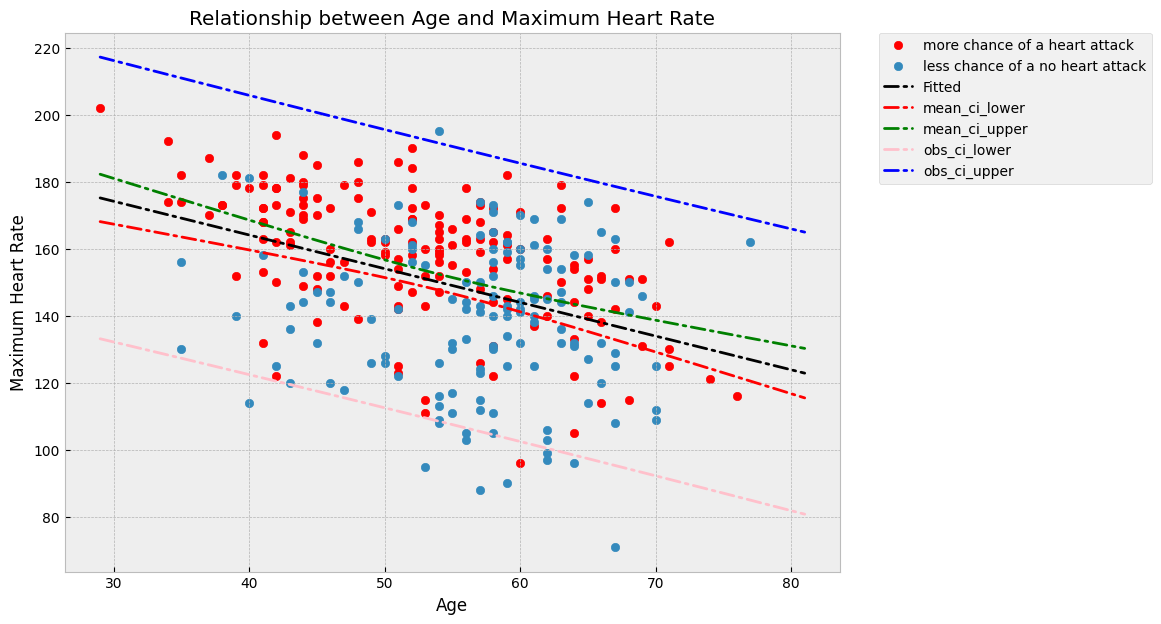

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.figure(figsize=(10,7))
plt.scatter(x=health2.age[health2.output == 1], y=health2.thalachh[health2.output == 1], c="red", label= 'more chance of a heart attack')
plt.scatter(x=health2.age[health2.output == 0], y=health2.thalachh[health2.output == 0], label= 'less chance of a no heart attack')
x= health2.age
y= health2.thalachh
modelReg = np.polyfit(x,y,1)
predict = np.poly1d(modelReg)
x_lin_reg = range(29,82)
y_lin_reg = predict(x_lin_reg)


plt.plot(x_lin_reg, y_lin_reg, c='black', label= 'Fitted', dash_capstyle='round', linestyle = (0,(5,2,1,2)));



plt.plot(x0, dfconf.mean_ci_lower, c='red', label='mean_ci_lower', dash_capstyle= 'round', linestyle= (0, (5,2,1,2)));
plt.plot(x0, dfconf.mean_ci_upper, c='green', label='mean_ci_upper', dash_capstyle= 'round', linestyle= (0, (5,2,1,2)));
plt.plot(x0, dfconf.obs_ci_lower, c='pink', label='obs_ci_lower', dash_capstyle= 'round', linestyle= (0, (5,2,1,2)));
plt.plot(x0, dfconf.obs_ci_upper, c='blue', label='obs_ci_upper', dash_capstyle= 'round', linestyle= (0, (5,2,1,2)));
plt.legend(bbox_to_anchor= (1.05,1), loc= 'upper left', borderaxespad=0.)

plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Relationship between Age and Maximum Heart Rate")
plt.show()


## Dataset for stroke prediction and linear regression


**Coefficient of determination: This will provide the percentage of the data that is closest to the line.


In [ ]:
import pandas as pd
health = pd.read_csv(rf'/content/healthcare-dataset-stroke-data.csv', sep=',')
health.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
import pandas as pd

# Load the dataset
health = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Convert 'ever_married' to numeric (label encoding)
health['ever_married'] = health['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop non-numeric columns if needed or handle them appropriately
numeric_columns = ['stroke', 'age', 'hypertension', 'heart_disease', 'ever_married',
                   'avg_glucose_level', 'bmi']

# Select only numeric columns for correlation matrix
numeric_health = health[numeric_columns]

# Build correlation matrix
correlation_matrix = numeric_health.corr()

# Display correlation matrix
print(correlation_matrix)


                     stroke       age  hypertension  heart_disease  \
stroke             1.000000  0.245257      0.127904       0.134914   
age                0.245257  1.000000      0.276398       0.263796   
hypertension       0.127904  0.276398      1.000000       0.108306   
heart_disease      0.134914  0.263796      0.108306       1.000000   
ever_married       0.108340  0.679125      0.164243       0.114644   
avg_glucose_level  0.131945  0.238171      0.174474       0.161857   
bmi                0.042374  0.333398      0.167811       0.041357   

                   ever_married  avg_glucose_level       bmi  
stroke                 0.108340           0.131945  0.042374  
age                    0.679125           0.238171  0.333398  
hypertension           0.164243           0.174474  0.167811  
heart_disease          0.114644           0.161857  0.041357  
ever_married           1.000000           0.155068  0.341695  
avg_glucose_level      0.155068           1.000000  0.175502 

In [ ]:
#coefficient of determination
#coefic determ are squered and give the ration of the variance  and the reponse variable explained by the predictor

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
results= ols('heart_disease ~ age', data= health).fit()
results.summary()
#response and predictor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          heart_disease   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     382.0
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           4.19e-82
Time:                        00:58:22   Log-Likelihood:                 532.28
No. Observations:                5110   AIC:                            -1061.
Df Residuals:                    5108   BIC:                            -1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0600      0.007     -9.114      0.000      -0.073      -0.047
age            0.0026      0.000     19.546      0.000       0.002       0.003
==============================================================================
Omnibus:                     3643.751   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38559.087
Skew:                           3.509   Prob(JB):                         0.00
Kurtosis:                      14.483   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

explained variance devide by total variance 0.07  ~ 7%
this lov value isnot a great predictor


In [ ]:
#expalined veraince
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

              sum_sq      df           F        PR(>F)
age        18.168997     1.0  382.042653  4.185819e-82
Residual  242.923762  5108.0         NaN           NaN


sum sq= explained veriance plus residule you get total variance,
r seqquered is explained variance / total varaince



In [ ]:
#here is the code how the value is calculated
explainedVariance = aov_table[ 'sum_sq'].iloc[0]
Residual = aov_table['sum_sq'].iloc[1]
totalVariance =  explainedVariance + Residual
rsq = explainedVariance / totalVariance

f' {rsq:.2%}'

' 6.96%'

Based on that dataset Age is not a great predictior




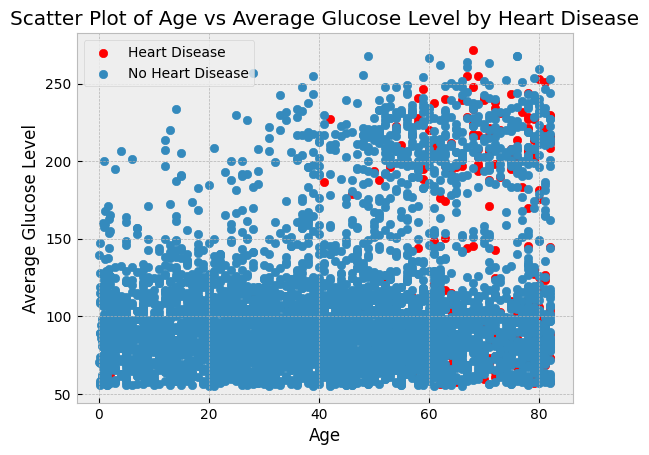

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr

plt.style.use('bmh')

# Assuming 'health' is your DataFrame loaded previously

# Create scatter plot
plt.scatter(x=health.age[health.heart_disease == 1], y=health.avg_glucose_level[health.heart_disease == 1], c="red")
plt.scatter(x=health.age[health.heart_disease == 0], y=health.avg_glucose_level[health.heart_disease == 0])
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.title("Scatter Plot of Age vs Average Glucose Level by Heart Disease")
plt.show()


## # RSE (Residual Standard Error) is the square root of the residual mean square, indicating how well the linear regression model fits the data


In [ ]:
#SSE residual sum of squares needs to be calulated
#Dataset https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
health2 = pd.read_csv('/content/heart.csv', sep=',')
health2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#corelation between age and thalacht
health2[['thalachh', 'age']].corr()

,thalachh,age
thalachh,1.000000,-0.398522
age,-0.398522,1.000000


In [ ]:
#ordinary least squares regression model
result= ols('thalachh ~ age', data= health2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               thalachh   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     56.83
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           5.63e-13
Time:                        18:06:21   Log-Likelihood:                -1352.0
No. Observations:                 303   AIC:                             2708.
Df Residuals:                     301   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    204.2892      7.348     27.800      0.000     189.828     218.750
age           -1.0051      0.133     -7.539      0.000      -1.267      -0.743
==============================================================================
Omnibus:                       19.088   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.556
Skew:                          -0.652   Prob(JB):                     2.09e-05
Kurtosis:                       2.927   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

determin resudual standard error=
squer root of residual mean squer === measure how well liner reg fits the data


In [ ]:
#Residual sum of squares SSE
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(result, typ=2)
print(aov_table)

                 sum_sq     df          F        PR(>F)
age        25163.909369    1.0  56.830554  5.628107e-13
Residual  133279.305153  301.0        NaN           NaN


In [ ]:
print(f'the results sum of squares(sse) turns out to be {result.ssr:0.3f}')

the results sum of squares(sse) turns out to be 133279.305


In [ ]:
# no observations 303 - 2 becouse p =2 simple linear regresion so substraction when it comes to degrees of freedom
#301
print(f'the results degrees of freedom(df) turns out to be {result.df_resid:0.3f}')

the results degrees of freedom(df) turns out to be 301.000


In [ ]:
# Residual mean square, which is the sum of squares divided by the residual degrees of freedom
# MSE = SSE / (n - p)


MSE = result.ssr/result.df_resid

In [ ]:
#Finally is to determin residual standard error which is square root of MSE
s= (MSE)**0.5
print(s)

21.042537613403233


In [ ]:
#simple way to get the Residual Standard Error
np.sqrt(result.scale)

21.042537613403233

Is there any threshold for RSE? The smaller the residual, the better the model fits the data.
If this is large, use a different model than linear regression.

Key takeaways: Residual standard deviation is the standard deviation of the residual values or the difference between a set of observed and predicted values.
The standard deviation of the residuals calculates how much the data points spread around the regression line.
The result is used to measure the error of the regression line's predictability.
The smaller the residual deviation is compared to the sample standard deviation, the more predictive or useful the model is.


In [ ]:
#is there any treshold for RSE ? the smoller the residual the better model fits the data
#if the this is large use other model thatn linear regression
#key takeaways : residual standard deviation is a standard deviation of the resiudal values or the
# difference between a set of observed and predicted values
#the standard deviation of the residuals caluclates how much the data points spread around the regression line
#the result is used to measure the error of the regression line's predicatbility
#the smaller resiudal dev is compared to the sample standard dev the more predicitve or usefull the model is


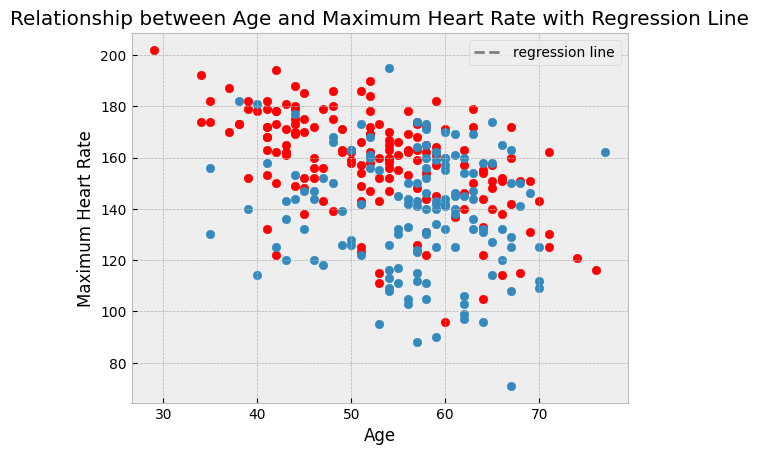

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.scatter(x=health2.age[health2.output == 1], y=health2.thalachh[health2.output == 1], c="red")
plt.scatter(x=health2.age[health2.output == 0], y=health2.thalachh[health2.output == 0])

x= health2['age']
y= health2['thalachh']

model = np.polyfit(x,y,1)
predict = np.poly1d(model)
x_lin_reg = range(29,28)
y_lin_reg = predict(x_lin_reg)


plt.plot(x_lin_reg, y_lin_reg, c='grey', linestyle= '--',label= 'regression line')
plt.plot(x_lin_reg, y_lin_reg, c='red', dash_capstyle='round', linestyle= (0,(5,2,1,2,)))

plt.legend()
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Relationship between Age and Maximum Heart Rate with Regression Line")
plt.show()
